###  1. Importing

In [48]:
import pandas as pd
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [49]:
df = pd.read_csv('Data_train.csv', sep=";")
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
display(df)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Visualisasi Dada Berdimensi Tinggi

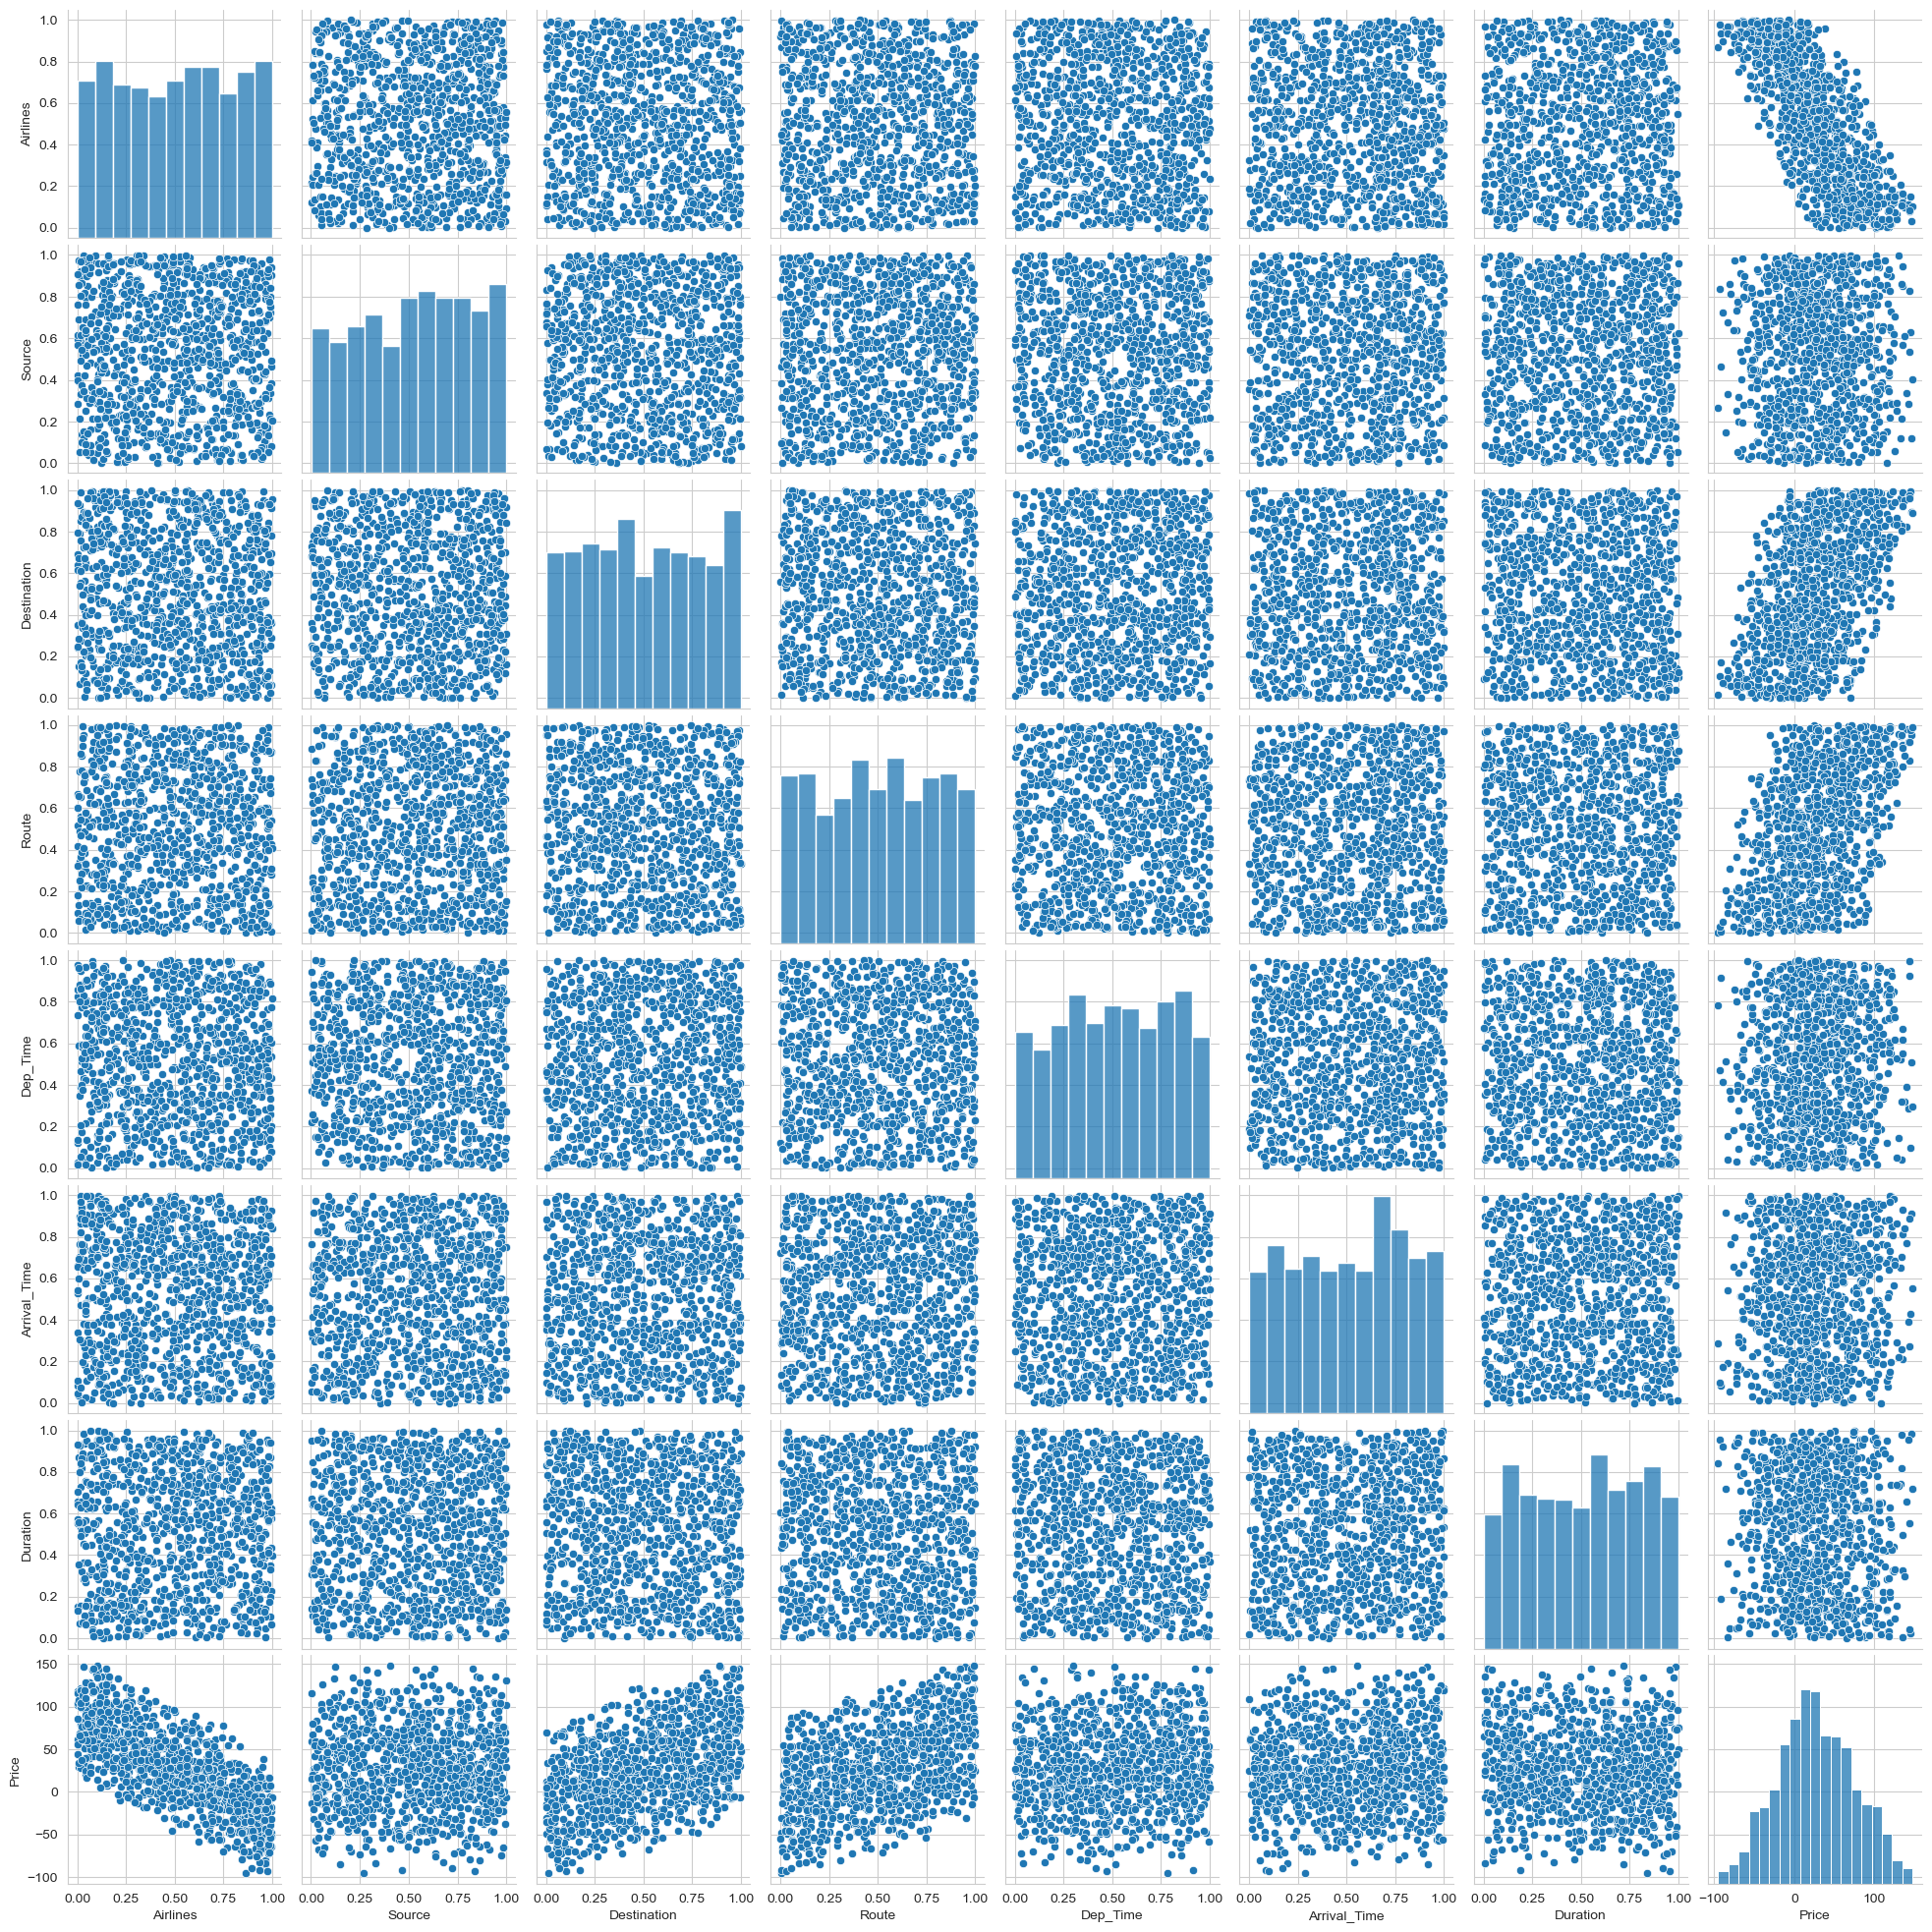

In [51]:
n = 1000
Xr = np.random.rand(7, n)
y = 10 - 120 * Xr[0, :] + 80 * Xr[2, :] + 75 * Xr[3, :] + 4 * np.random.normal(0, 1, n)
d = {
"Airlines": pd.Series(Xr[0, :], index=range(n)),
"Source": pd.Series(Xr[1, :], index=range(n)),
"Destination": pd.Series(Xr[2, :], index=range(n)),
"Route": pd.Series(Xr[3, :], index=range(n)),
"Dep_Time": pd.Series(Xr[4, :], index=range(n)),
"Arrival_Time": pd.Series(Xr[5, :], index=range(n)),
"Duration": pd.Series(Xr[6, :], index=range(n)),
"Price": pd.Series(y, index=range(n)),
}
df = pd.DataFrame(d)
df

sns.set_style("whitegrid")
sns.pairplot(df[["Airlines", "Source", "Destination", "Route", "Dep_Time", "Arrival_Time", "Duration", "Price"]])

### 2.1 Data Cleaning

In [64]:
#clean duplicated and null data
df.dropna(inplace=True)
df.isnull().sum()
df.drop_duplicates(keep='first',inplace=True)
df.shape

(7833, 14)

### 2.2 Date and Time

In [53]:
df = pd.read_csv('Data_train.csv', sep=";")
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month
df['date_is_weekend'] = np.where(df['Date_of_Journey'].dt.day_name().isin(['Saturday','Sunday']),1,0)
df

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,date_is_weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,1
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,1
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,0


### 2.3 Deploy and Arrival Hours

In [54]:
#cleaning the deploy hour
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))

#cleaning the arrival hour
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_Min'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1].split()[0]))

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,0,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,0,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,0,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,0,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,1,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,1,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,0,11,30,14,10


### 2.4 Durations

In [55]:
df["Duration"].unique()

def impute_Duration(duration):
    x = duration.split()
    if len(x) != 2:
        if 'h' in x[0]:
            return x[0] + ' 0m'
        else:
            return '0h ' + x[0]
    else:
        return duration
    
df['Duration'] = df['Duration'].apply(impute_Duration)

df['Duration_Hour'] = df['Duration'].apply(lambda x:int(x.split('h')[0]))
df['Duration_Minute'] = df['Duration'].apply(lambda x:x.split('m')[0].split()[1])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h 0m,2 stops,No info,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,0,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,0,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,1,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h 0m,non-stop,No info,7229,27,4,1,8,20,11,20,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,0,11,30,14,10,2,40


### 2.5 Total Stops

In [56]:
df['Total_Stops'].unique()
df = df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

df = df.drop(['Route','Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info'], axis='columns')
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,5,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,0,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,0,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,0,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,4,9,0,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,1,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,1,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0.0,12648,3,1,0,11,30,14,10,2,40


### 2.6 removing outliers

In [57]:
def remove_airline_price_outliers(df):
    df_out = pd.DataFrame()
    for airline,airline_df in df.groupby('Airline'):
        for source,source_df in airline_df.groupby('Source'):
            for destination,destination_df in source_df.groupby('Destination'):
                mean = np.mean(destination_df['Price'])
                stdev = np.std(destination_df['Price'])
                reduced_df = destination_df[(destination_df['Price'] >=(mean-stdev)) & (destination_df['Price'] <= (mean+stdev))]
                df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_airline_price_outliers(df)

### 3. Model Building

In [88]:
x = df.drop('Price',axis=1)
y = df['Price']
dummies = pd.get_dummies(x[['Airline','Source','Destination']],drop_first=True)
x = pd.concat([x, dummies], axis=1)
x = x.drop(["Airline", "Source", "Destination"], axis= "columns")
display(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=18,splitter='random')

#model training
model.fit(x_train, y_train)
print(model.score(x_test,y_test))

,Total_Stops,journey_day,journey_month,date_is_weekend,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,5,6,0,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
1,0.0,4,3,0,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0
2,0.0,6,12,0,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
3,0.0,24,4,0,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
4,0.0,18,4,0,11,10,13,55,2,45,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,1.0,3,6,0,20,55,22,55,26,0,...,0,0,0,0,1,0,0,1,0,0
8027,1.0,3,6,0,10,25,22,55,12,30,...,0,0,0,0,1,0,0,1,0,0
8028,0.0,4,6,0,11,30,14,20,2,50,...,1,0,0,0,0,0,1,0,0,0
8029,0.0,3,3,1,16,0,18,35,2,35,...,1,0,0,0,0,0,0,0,0,1


0.8722253482808877


# Melakukan Prediksi 

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = DecisionTreeRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=18,splitter='random')

#model training pada data latih
model.fit(x_train, y_train)
score_train = model.score(x_train, y_train)
print("Score pada data latih:", score_train)

#model evaluation pada data uji
score_test = model.score(x_test,y_test)
print("Score pada data uji:", score_test)


Score pada data latih: 0.9325546130237077
Score pada data uji: 0.864594077307528


In [92]:
from sklearn.metrics import mean_squared_error

# Menghitung MSE pada data latih
y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE pada data latih: ", mse_train)

# Menghitung MSE pada data uji
y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE pada data uji: ", mse_test)


MSE pada data latih:  1007476.8468347503
MSE pada data uji:  1726076.077469125
